In [ ]:
!unzip '/content/drive/MyDrive/birds.zip'

Archive:  /content/drive/MyDrive/birds.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/test_data/bonegl/DSC_4588.jpg  
  inflating: test_data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


DATA AUGMENTATION

In [ ]:
#we need to do data augmentataion,, to add more trainable datasets and for overfitting
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen= ImageDataGenerator(rescale = (1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255)) #Normalization

In [ ]:
train = train_gen.flow_from_directory('/content/test_data/test_data',target_size=(120,120),class_mode='categorical',batch_size=3)

Found 157 images belonging to 16 classes.


In [ ]:
test = test_gen.flow_from_directory('/content/test_data/test_data',target_size=(120,120),class_mode='categorical',batch_size=3)

Found 157 images belonging to 16 classes.


TO KNOW ALL TYPE OF BIRDS

In [ ]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

MODEL BUILDING

In [ ]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
#build the skeleton
from tensorflow.keras.models import Sequential
Asish_birds_model = Sequential()
Asish_birds_model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120,120,3)))
Asish_birds_model.add(MaxPooling2D(pool_size=(2,2)))
Asish_birds_model.add(Flatten())
#hidden layers
Asish_birds_model.add(Dense(45,activation='relu'))
Asish_birds_model.add(Dense(16,activation='Softmax'))

In [ ]:
#compile the mode
Asish_birds_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


TRAINIGN THE MODEL with 30 epochs

In [ ]:
#training the model
Asish_birds_model.fit(train,batch_size=3,validation_data=test,epochs = 30)

Epoch 1/30
53/53 [==============================] - 109s 2s/step - loss: 3.3405 - accuracy: 0.1274 - val_loss: 2.6641 - val_accuracy: 0.1338
Epoch 2/30
53/53 [==============================] - 105s 2s/step - loss: 2.6257 - accuracy: 0.1720 - val_loss: 2.4827 - val_accuracy: 0.1783
Epoch 3/30
53/53 [==============================] - 106s 2s/step - loss: 2.4390 - accuracy: 0.1911 - val_loss: 2.3955 - val_accuracy: 0.2229
Epoch 4/30
53/53 [==============================] - 136s 3s/step - loss: 2.2990 - accuracy: 0.2293 - val_loss: 2.3170 - val_accuracy: 0.2229
Epoch 5/30
53/53 [==============================] - 104s 2s/step - loss: 2.1802 - accuracy: 0.2548 - val_loss: 2.0675 - val_accuracy: 0.3312
Epoch 6/30
53/53 [==============================] - 104s 2s/step - loss: 2.0382 - accuracy: 0.2994 - val_loss: 1.9757 - val_accuracy: 0.3822
Epoch 7/30
53/53 [==============================] - 102s 2s/step - loss: 1.9624 - accuracy: 0.3567 - val_loss: 1.8295 - val_accuracy: 0.4140
Epoch 8/30
53

Maximum Acuuracy is achieved through higher epochs

In [ ]:
#summary of the model
Asish_birds_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 118, 118, 20)      560       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 59, 59, 20)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 69620)             0         
                                                                 
 dense_6 (Dense)             (None, 45)                3132945   
                                                                 
 dense_7 (Dense)             (None, 16)                736       
                                                                 
Total params: 3,134,241
Trainable params: 3,134,241
Non-trainable params: 0
____________________________________________

In [ ]:
#saving the model in h5 format 
Asish_birds_model.save('Asish_birds_model.h5')

In [ ]:
#testing 
import numpy as np
from tensorflow.keras.preprocessing import image

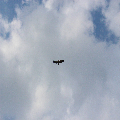

In [ ]:
# Testing 1
img1 = image.load_img('/content/download.png',target_size=(120,120))
img1

In [ ]:

reshaped_img = np.reshape(img1, (120, 120, 3))
reshaped_img = np.expand_dims(reshaped_img,axis=0)
pred = np.argmax(Asish_birds_model.predict(reshaped_img))
print(pred)

1/1 [==============================] - 0s 54ms/step
8


In [ ]:
output=['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

himgri


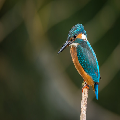

In [ ]:
# Testing 2
img2 = image.load_img('/content/photo.jpeg',target_size=(120,120))
img2

In [ ]:
reshaped_img = np.reshape(img1, (120, 120, 3))
reshaped_img = np.expand_dims(reshaped_img,axis=0)
pred = np.argmax(Asish_birds_model.predict(reshaped_img))
print(pred)
output=['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 18ms/step
8
himgri


As we got Best results .. we dont need Tuning .. But for practise purpose I am doing it

TUNING THE MODEL

In [ ]:
Asish_birds_model = Sequential()
Asish_birds_model.add(Convolution2D(12,(3,3),activation='relu',input_shape=(120, 120, 3)))
Asish_birds_model.add(MaxPooling2D(pool_size=(2,2)))
Asish_birds_model.add(Convolution2D(24,(3,3),activation='relu'))
Asish_birds_model.add(MaxPooling2D(pool_size=(2,2)))
Asish_birds_model.add(Convolution2D(36,(3,3),activation='relu'))
Asish_birds_model.add(MaxPooling2D(pool_size=(2,2)))
Asish_birds_model.add(Flatten())
Asish_birds_model.add(Dense(62,activation='relu'))
Asish_birds_model.add(Dense(32,activation='relu'))
Asish_birds_model.add(Dense(16,activation='relu'))
Asish_birds_model.add(Dense(16,activation='softmax'))

In [ ]:
#compile the mode
Asish_birds_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
#training the model
Asish_birds_model.fit(train,batch_size=3,validation_data=test,epochs = 10)

Epoch 1/10
53/53 [==============================] - 97s 2s/step - loss: 2.7156 - accuracy: 0.1338 - val_loss: 2.6001 - val_accuracy: 0.1720
Epoch 2/10
53/53 [==============================] - 97s 2s/step - loss: 2.6171 - accuracy: 0.1656 - val_loss: 2.6135 - val_accuracy: 0.1401
Epoch 3/10
53/53 [==============================] - 97s 2s/step - loss: 2.6037 - accuracy: 0.1274 - val_loss: 2.6420 - val_accuracy: 0.1274
Epoch 4/10
53/53 [==============================] - 97s 2s/step - loss: 2.7304 - accuracy: 0.1338 - val_loss: 2.6661 - val_accuracy: 0.1210
Epoch 5/10
53/53 [==============================] - 97s 2s/step - loss: 2.5451 - accuracy: 0.2166 - val_loss: 2.4909 - val_accuracy: 0.1975
Epoch 6/10
53/53 [==============================] - 94s 2s/step - loss: 2.4443 - accuracy: 0.2038 - val_loss: 2.3959 - val_accuracy: 0.1783
Epoch 7/10
53/53 [==============================] - 130s 2s/step - loss: 2.3816 - accuracy: 0.2166 - val_loss: 2.2031 - val_accuracy: 0.2166
Epoch 8/10
53/53 [=

We can see accuracy decreased a lot

**Now lets do this same with transfer Learning Models**

VGG16

In [3]:
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np


In [4]:
!unzip '/content/drive/MyDrive/bird1.zip'

Archive:  /content/drive/MyDrive/bird1.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/test_data/bonegl/DSC_4588.jpg  
  inflating: test_data

In [5]:
train_gen = ImageDataGenerator(rescale= 1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_gen  =ImageDataGenerator(rescale=1./255)

In [6]:
train_path = '/content/train_data/train_data'
test_path = '/content/test_data/test_data'

In [7]:
train = train_gen.flow_from_directory(train_path,target_size=(224,244),batch_size=3,class_mode='categorical')
test = test_gen.flow_from_directory(test_path,target_size=(224,224),batch_size=3,class_mode='categorical')

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [8]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input


In [9]:
vgg = VGG16(include_top = False,weights='imagenet',input_shape=(224,224,3))


58889256/58889256 [==============================] - 2s 0us/step


In [10]:
for layer in vgg.layers:
  print(layer)

In [11]:
x = Flatten()(vgg.output)

In [12]:
out = Dense(16,activation = 'softmax')(x)

In [13]:
#model
Asish_vgg_model = Model(inputs = vgg.input,outputs=out)

In [14]:
Asish_vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
Asish_vgg_model.compile(loss= 'categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [17]:
Asish_vgg_model.fit(train,validation_data=test,epochs=15,steps_per_epoch = len(train),validation_steps= len(test))

Epoch 1/15
50/50 [==============================] - 98s 2s/step - loss: 2.7892 - accuracy: 0.0933 - val_loss: 2.7700 - val_accuracy: 0.0764
Epoch 2/15
50/50 [==============================] - 93s 2s/step - loss: 2.7992 - accuracy: 0.1200 - val_loss: 2.7657 - val_accuracy: 0.1274
Epoch 3/15
50/50 [==============================] - 93s 2s/step - loss: 2.7638 - accuracy: 0.1333 - val_loss: 2.7606 - val_accuracy: 0.1210
Epoch 4/15
50/50 [==============================] - 91s 2s/step - loss: 2.7600 - accuracy: 0.1333 - val_loss: 2.7577 - val_accuracy: 0.1210
Epoch 5/15
50/50 [==============================] - 95s 2s/step - loss: 2.7565 - accuracy: 0.1333 - val_loss: 2.7545 - val_accuracy: 0.1210
Epoch 6/15
50/50 [==============================] - 93s 2s/step - loss: 2.7533 - accuracy: 0.1333 - val_loss: 2.7511 - val_accuracy: 0.1210
Epoch 7/15
50/50 [==============================] - 94s 2s/step - loss: 2.7498 - accuracy: 0.1333 - val_loss: 2.7484 - val_accuracy: 0.1210
Epoch 8/15
50/50 [==

**Conclusion :The Basic CNN has best Accuracy with 97 percent for this Case ** 

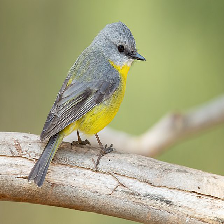

In [24]:
# Testing 2
img2 = image.load_img('/content/photo.jpg',target_size=(224,224))
img2

In [25]:
reshaped_img = np.reshape(img2, (224, 224, 3))
reshaped_img = np.expand_dims(reshaped_img,axis=0)
pred = np.argmax(Asish_vgg_model.predict(reshaped_img))
print(pred)
output=['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 138ms/step
7
himbul
